In [116]:
import pandas as pd
import plotly.express as px

# Load penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [117]:
pingees['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

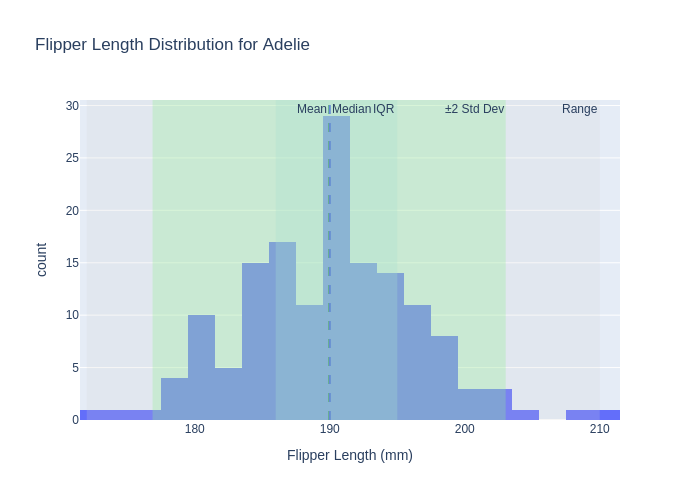

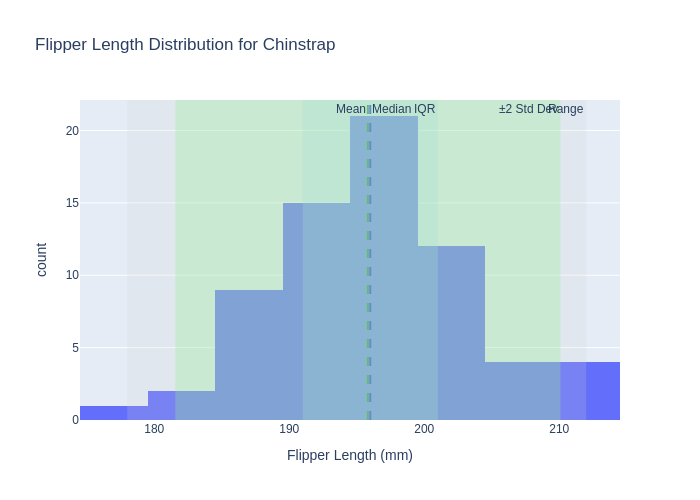

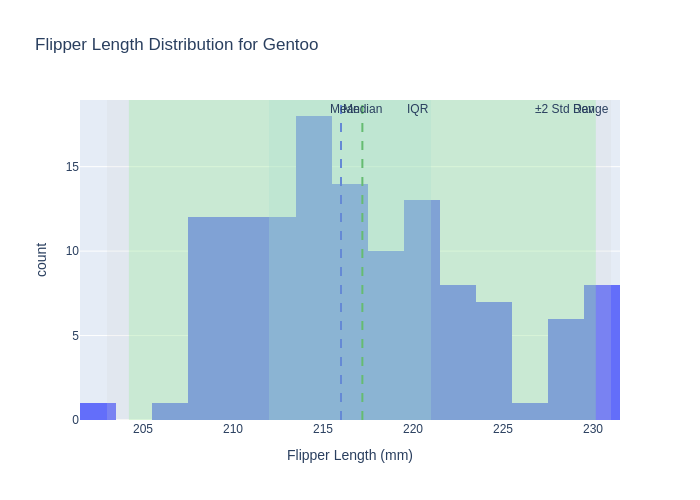

In [118]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out missing values for 'flipper_length_mm'
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Loop through each species to create individual histograms with statistical annotations
for species in pingees['species'].unique():
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    
    # Calculate statistical values
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_val = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Create histogram
    fig = px.histogram(species_data, 
                       x=species_data, 
                       title=f'Flipper Length Distribution for {species}', 
                       labels={'x': 'Flipper Length (mm)', 'y': 'Count'})
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_val, line_dash="dash", line_color="blue", annotation_text="Median", annotation_position="top right")
    
    # Add vertical rectangles for range, IQR, and 2 std deviation range
    # Range: Min to Max
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="lightgray", opacity=0.2, line_width=0, annotation_text="Range")
    
    # Interquartile Range (IQR): Q1 to Q3
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightblue", opacity=0.3, line_width=0, annotation_text="IQR")
    
    # 2 standard deviations from mean: (mean - 2*std) to (mean + 2*std)
    fig.add_vrect(x0=mean_val - 2*std_val, x1=mean_val + 2*std_val, fillcolor="lightgreen", opacity=0.3, line_width=0, annotation_text="±2 Std Dev")
    
    # Show the figure
    fig.show(renderer="png")

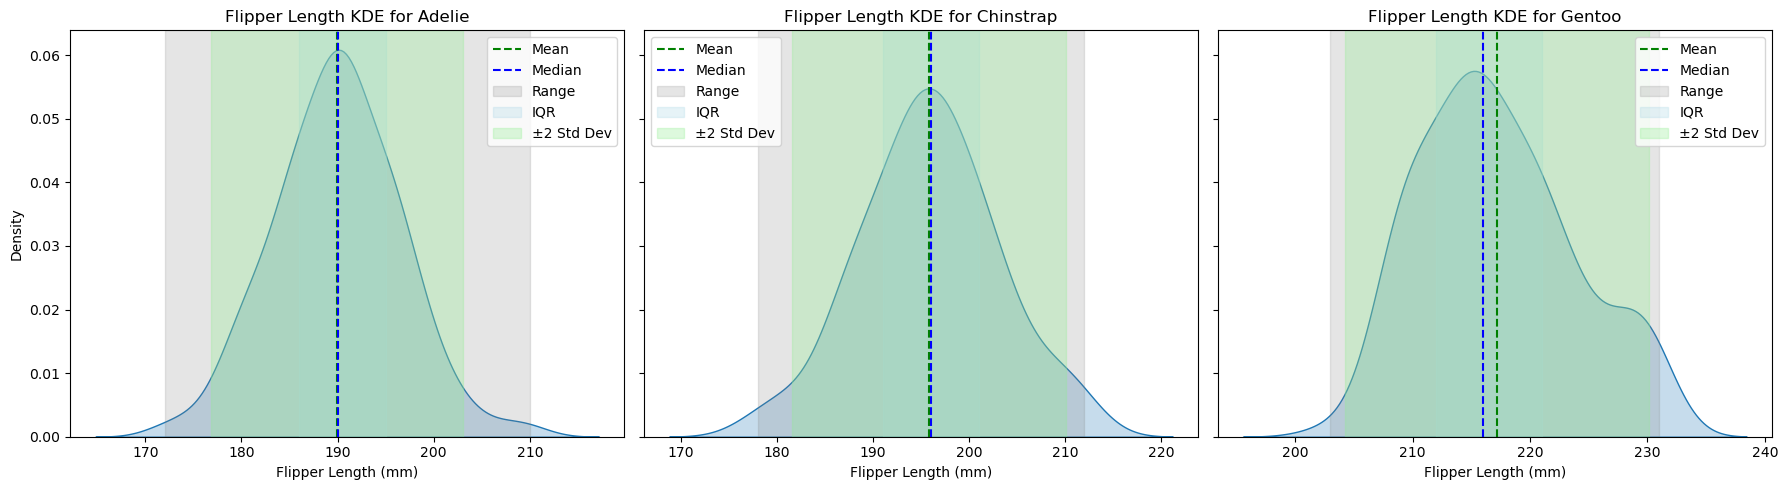

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out missing values for 'flipper_length_mm'
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Set up the figure for 3 KDE plots (one for each species) in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop through each species to create individual KDE plots
for i, species in enumerate(pingees['species'].unique()):
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    
    # Calculate statistical values
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_val = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Create KDE plot for each species
    ax = axes[i]
    sns.kdeplot(species_data, ax=ax, fill=True)  # Replace shade=True with fill=True
    ax.set_title(f'Flipper Length KDE for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_val, color='green', linestyle='--', label='Mean')
    ax.axvline(median_val, color='blue', linestyle='--', label='Median')
    
    # Add shaded regions for range, IQR, and ±2 standard deviation range
    # Range: Min to Max
    ax.axvspan(min_val, max_val, color='gray', alpha=0.2, label='Range')
    
    # Interquartile Range (IQR): Q1 to Q3
    ax.axvspan(q1, q3, color='lightblue', alpha=0.3, label='IQR')
    
    # 2 standard deviations from mean: (mean - 2*std) to (mean + 2*std)
    ax.axvspan(mean_val - 2*std_val, mean_val + 2*std_val, color='lightgreen', alpha=0.3, label='±2 Std Dev')
    
    # Add a legend
    ax.legend()

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

Q3 My preference out of these 3 choices is the KDE, mainly since it is flexible. By changing the bandwith, I can adjust the visualization to investigate the data from possibly different angles. Moreover, it shows meaningful data distribution and helps you easily tell important data details such as where the mean is and how much the variation is. It does not suffer terribly for the data loss for any aspect in particular. Finally, the curve is pleasing to look at.

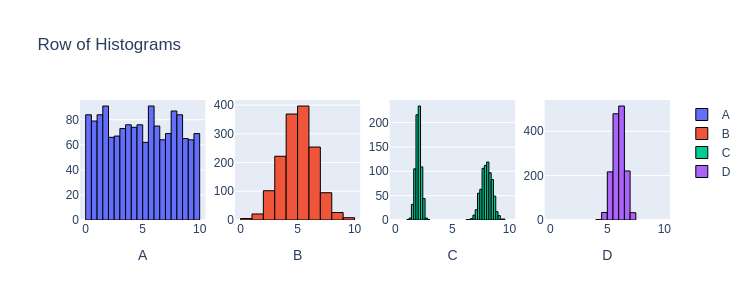

In [121]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q4

1. A, C
2. A, B
3. B, D
4. A, D

ChatGPT Summary #1

Summary of Exchanges

    Initial Task:
        You requested assistance in using Plotly to create histograms of the flipper_length_mm for each species in the penguins dataset. You wanted to mark key statistical values (mean, median, range, interquartile range, and ±2 standard deviations) on these histograms using fig.add_vline() and fig.add_vrect().

    Response:
        I provided a Python code snippet using Plotly to create histograms for each penguin species, adding vertical lines for the mean and median and shaded rectangles for the specified ranges.

    Second Task:
        You requested to repeat the task using Seaborn KDE plots instead of histograms, organizing the plots in a row of three.

    Response:
        I provided a new code snippet using Seaborn to create KDE plots for each species, adding vertical lines and shaded regions for the same statistical values as before. The plots were arranged in a 1x3 layout.

    Deprecation Warning:
        You received a warning about the shade parameter being deprecated in Seaborn and requested an update to the code.

    Updated Code:
        I modified the Seaborn KDE plotting code to use fill=True instead of shade=True, ensuring that it adheres to the latest version of the library without generating warnings.
        
https://chatgpt.com/share/66f60660-e32c-800d-b105-a774b1d6fb16

ChatGPT Summary #2

Summary of Interactions:

    Data Analysis Context: The user is working on data analysis, specifically using Python and pandas to perform simple summary analyses, focusing on datasets like the Titanic and penguins (referred to as "pingees"). They are also exploring data visualization techniques with Seaborn, including Kernel Density Estimators (KDE).

    Visualization Methods Discussion: The user requested a "pros and cons" list for three data distribution visualization methods: box plots, histograms, and kernel density estimators (KDE).

    Pros and Cons List:
        Box Plots:
            Pros: Summarizes key statistics, allows for comparative analysis, identifies outliers, and is robust against extreme values.
            Cons: Limited detail about distribution shape, data loss in summary statistics, and potential misleading interpretations for non-normal distributions.
        Histograms:
            Pros: Show frequency distribution, retain more data detail, and are versatile in representation.
            Cons: Subjectivity in binning can mislead, cluttered appearance with many data points, and less effective for comparing multiple groups.
        Kernel Density Estimators (KDE):
            Pros: Provide a smooth curve of distribution, avoid binning subjectivity, and are effective for comparing distributions.
            Cons: Sensitivity to bandwidth choice, risk of overfitting/underfitting, and potential for less intuitive interpretations.

    Conclusion: The user was able to assess the strengths and weaknesses of each visualization method to aid in their data analysis tasks.

https://chatgpt.com/share/66f60798-3a40-800d-bb80-7440efa41498

Q5

For skewed data, the relationship between the mean and median depends on if the data is right or left skewed. For right-skewed data, the tail on the right side is longer than the left side. Therefore This means there are values that pull the mean up. In fact, in a right-skewed data, the data mean is greater than the data median.

For left-skewed data, it is the exact opposite, there are values in the left that pull the mean down. Therefore there is a tail on the left side and the median is now greater than the mean.


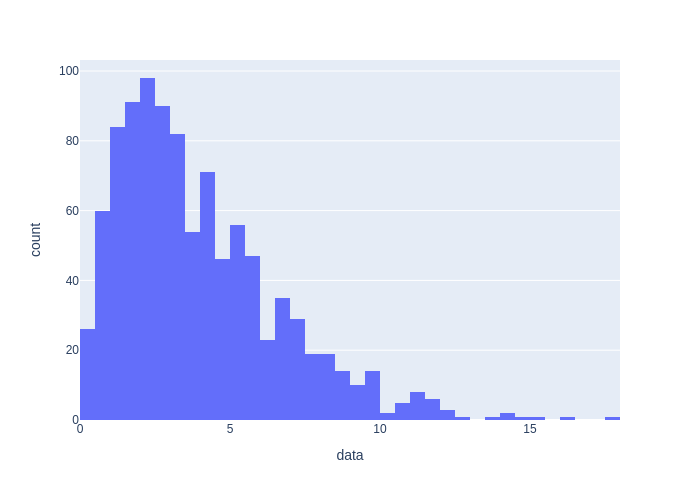

In [122]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
fig1.show(renderer="png")

Illustrated here, there is a long tail on the right side of the data, therefore this is an example of right-skewed data.

In [123]:
sample1.mean() # mean


3.972459778673193

In [124]:
print(np.quantile(sample1, [0.5])) # median


[3.31569004]


We observe that the mean is greater than the median for this data, confirming that this data is right-skewed.

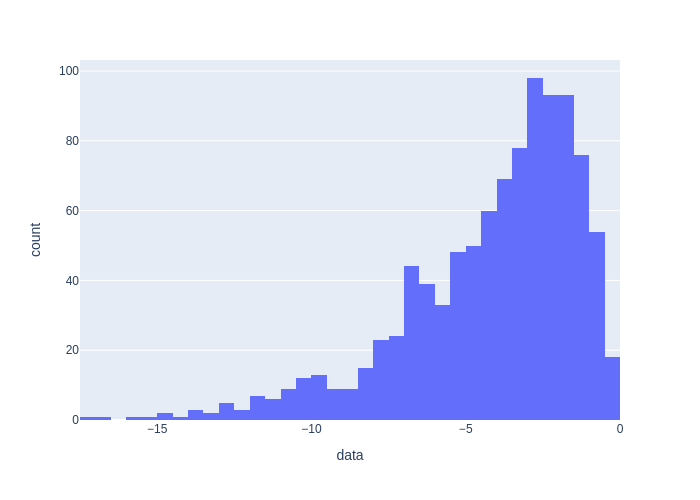

In [125]:

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

By mirroring the sample1 data, we get sample2, where the data is clearly left skewed now. This time the data median is greater than the data mean.

In [127]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv")
df

,city,state,country,report,latitude,longitude,date,year,month,day,decade,norm_population
0,san marcos,tx,us,4/27/2004,29.883056,-97.941111,1949-10-10,1949,10,10,1940,1.558889e-07
1,edna,tx,us,1/17/2004,28.978333,-96.645833,1956-10-10,1956,10,10,1950,1.296816e-07
2,kaneohe,hi,us,1/22/2004,21.418056,-157.803611,1960-10-10,1960,10,10,1960,1.580348e-06
3,bristol,tn,us,4/27/2007,36.595000,-82.188889,1961-10-10,1961,10,10,1960,2.803406e-07
4,norwalk,ct,us,10/2/1999,41.117500,-73.408333,1965-10-10,1965,10,10,1960,3.944409e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
65109,nashville,tn,us,9/30/2013,36.165833,-86.784444,2013-09-09,2013,9,9,2010,1.575770e-07
65110,boise,id,us,9/30/2013,43.613611,-116.202500,2013-09-09,2013,9,9,2010,6.379252e-07
65111,napa,ca,us,9/30/2013,38.297222,-122.284444,2013-09-09,2013,9,9,2010,2.684279e-08
65112,vienna,va,us,9/30/2013,38.901111,-77.265556,2013-09-09,2013,9,9,2010,1.249840e-07


In [128]:
df.describe()

,latitude,longitude,year,month,day,decade,norm_population
count,65114.000000,65114.000000,65114.000000,65114.000000,65114.000000,65114.000000,6.511400e+04
mean,38.357911,-95.710870,2004.090057,6.861597,15.014482,1999.938416,2.127444e-07
std,5.570121,18.108493,10.385694,3.248243,8.914654,11.217866,3.054647e-07
min,17.967778,-176.658056,1910.000000,1.000000,1.000000,1910.000000,2.684279e-08
25%,34.106389,-115.116667,2001.000000,4.000000,7.000000,2000.000000,5.958657e-08
50%,38.968611,-90.065556,2007.000000,7.000000,15.000000,2000.000000,1.412726e-07
75%,41.947500,-81.023056,2011.000000,10.000000,22.000000,2010.000000,2.248656e-07
max,70.636944,-65.831667,2014.000000,12.000000,31.000000,2010.000000,1.686966e-05


In [129]:
df.columns

Index(['city', 'state', 'country', 'report', 'latitude', 'longitude', 'date',
       'year', 'month', 'day', 'decade', 'norm_population'],
      dtype='object')

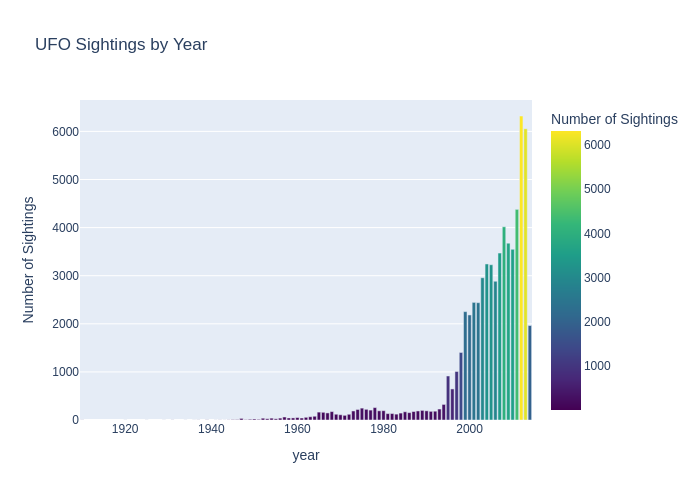

In [130]:
import plotly.express as px

# Group by year and count sightings
sightings_by_year = df['year'].value_counts().reset_index()
sightings_by_year.columns = ['year', 'sightings']

fig = px.bar(sightings_by_year, x='year', y='sightings', 
             title='UFO Sightings by Year',
             labels={'sightings': 'Number of Sightings'},
             color='sightings', 
             color_continuous_scale=px.colors.sequential.Viridis)
fig.show(renderer="png")

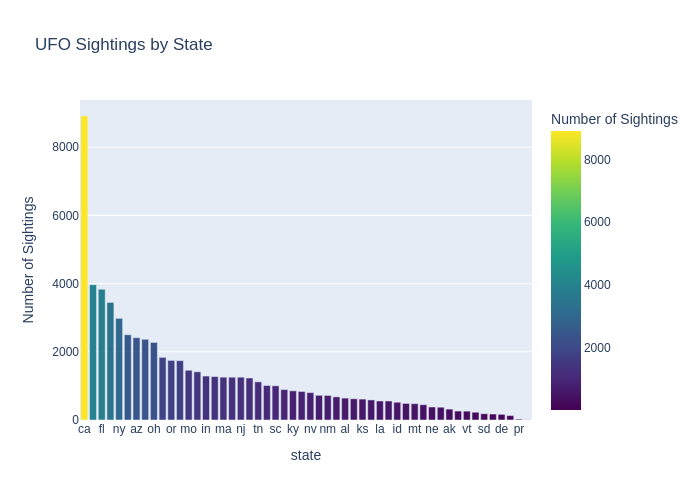

In [131]:
sightings_by_state = df['state'].value_counts().reset_index()
sightings_by_state.columns = ['state', 'count']

fig = px.bar(sightings_by_state, x='state', y='count', 
             title='UFO Sightings by State',
             labels={'count': 'Number of Sightings'},
             color='count',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.show(renderer="png")

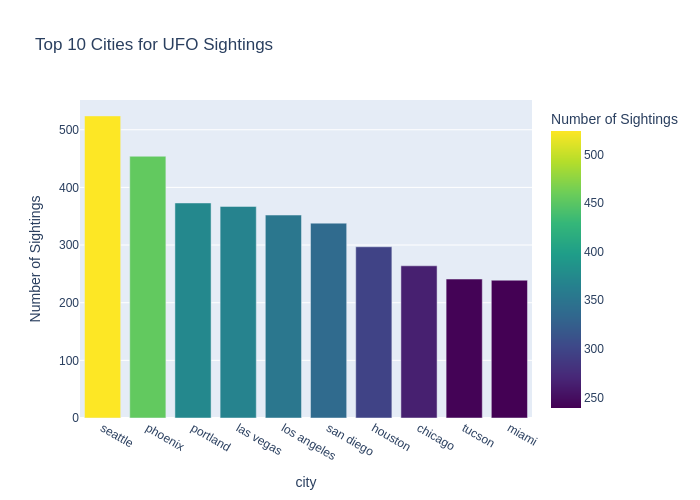

In [132]:
sightings_by_city = df['city'].value_counts().head(10).reset_index()
sightings_by_city.columns = ['city', 'count']

fig = px.bar(sightings_by_city, x='city', y='count', 
             title='Top 10 Cities for UFO Sightings',
             labels={'count': 'Number of Sightings'},
             color='count',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.show(renderer="png")

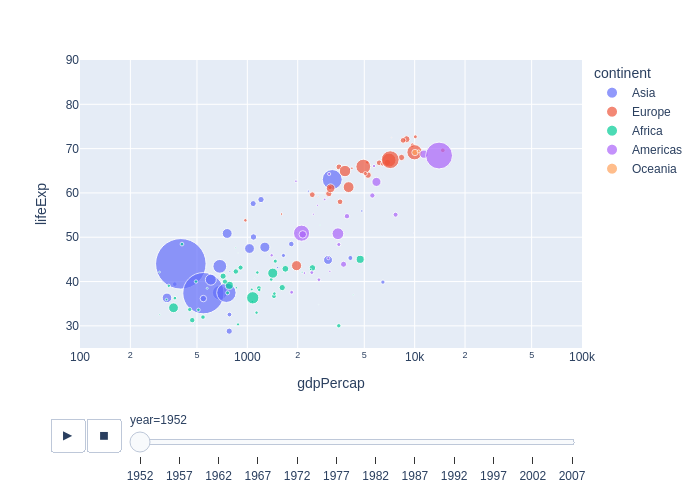

In [133]:
import plotly.express as px
import plotly.io as pio  # Import the plotly.io module

# Load the gapminder dataset
df = px.data.gapminder()

# Create the scatter plot
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100, 100000], 
                 range_y=[25, 90])

# Save the figure as a PNG file
fig.write_image("gapminder_scatter.png")  # Specify the filename

# Show the figure in the notebook
fig.show(renderer="png")  # Optional: display the figure

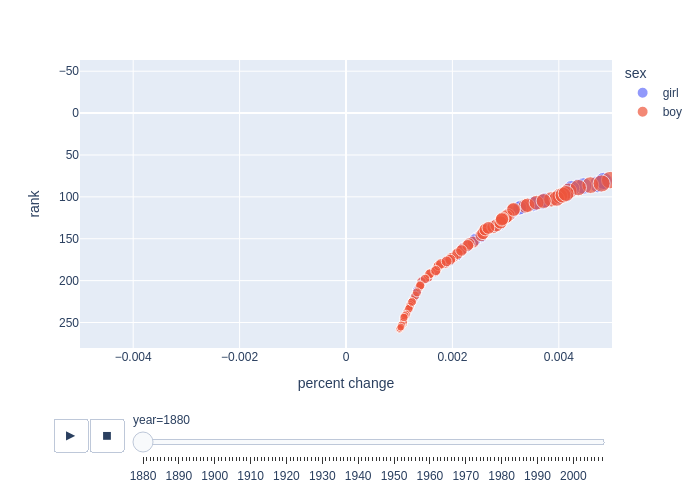

In [135]:
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex'] 

# Rank names within each year based on their percent prevalence
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values for processing
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change
bn['percent change'] = bn['percent'].diff()

# Create a boolean array to identify new names
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 

# Sort by year
bn = bn.sort_values('year')

# Restrict to "common" names
bn = bn[bn.percent > 0.001]

# Create the scatter plot with specified parameters
fig = px.scatter(bn, 
                 x='percent change',   # Set x-axis to 'percent change'
                 y='rank',            # Set y-axis to 'rank'
                 animation_frame='year',  # Animate by year
                 animation_group='name',   # Group by name for animation
                 size='percent',      # Size by 'percent'
                 color='sex',         # Color by 'sex'
                 hover_name='name',   # Hover text shows 'name'
                 size_max=50, 
                 range_x=[-0.005, 0.005])  # Set x-axis range

# Update y-axis to reverse order
fig.update_yaxes(autorange='reversed')  # This lets us put rank 1 on the top

# Show the figure
fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q9: Yes, ChatGPT

ChatGPT Summary #3

Summary of Interactions

    Exploration of Mean, Median, and Skewness:
        We discussed the relationship between the mean and median in the context of right and left skewness.
        Right Skewness (Positive Skew): The mean is greater than the median due to a long tail on the right side, influenced by high values (outliers).
        Left Skewness (Negative Skew): The mean is less than the median because of a long tail on the left side, influenced by low values (outliers).
        We highlighted that the mean is sensitive to outliers while the median is more robust in skewed distributions.

    Python Code Explanation:
        You provided a Python code snippet that uses libraries like scipy, pandas, numpy, and plotly.express.
        The code generates a random sample from a gamma distribution and creates a histogram to visualize the distribution.
        It calculates the mean and median of the generated sample and then creates another sample by negating the original, resulting in a left-skewed distribution.
        The importance of using fig1.show(renderer="png") for proper visualization in specific submission contexts was noted.
        
https://chatgpt.com/share/66f61ed7-71d4-800d-96fc-6c372d7ab94b

ChatGPT Summary #4

Summary of Interactions

    Data Analysis with UFO Dataset:
        You provided a link to a UFO sightings dataset and requested assistance in using summary statistics and visualizations to understand the data.
        We discussed generating visualizations of UFO sightings by country and other aspects.

    Exploring Distribution Visuals:
        You inquired about applicable variables in the dataset for meaningful distribution visuals, specifically asking about box plots and KDE (Kernel Density Estimate) plots.

    KDE Plot for California:
        You requested help in creating a KDE plot for UFO sightings specifically in California by month.

    Dash Application Setup:
        You shared a Dash application code snippet and encountered a ModuleNotFoundError due to the absence of the Dash module. We discussed the limitations of running Dash on JupyterHub.

    Baby Names Dataset:
        You shared code related to the baby names dataset and sought assistance in modifying a Plotly scatter plot to visualize changes in name prevalence. I helped with the px.scatter() function parameters.

    KDE Plots with Penguins Dataset:
        You provided a code snippet for generating KDE plots using the penguins dataset and asked how to save the figure as a PNG file. I explained how to use plt.savefig().

    Saving Plotly Figures:
        You wanted to save a Plotly figure as a PNG and inquired about adding renderer="png". I provided instructions on using the write_image method to save the figure, along with details on installing the required kaleido package.
        
https://chatgpt.com/share/66f61ec0-3468-800d-b392-4b3aa537396a